# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
# Ignores warnings such as a library needs to be updated
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Library to split data
from sklearn.model_selection import train_test_split

# These are the ensemble classifiers
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Metric score libraries
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score
import scipy.stats as stats

# To tune different models
from sklearn.model_selection import GridSearchCV

In [ ]:
# Connecting my google drive
from google.colab import drive
drive.mount('/content/drive')

# reading the data
data = pd.read_csv('/content/drive/MyDrive/Colab/EasyVisa.csv')
# returns a random 10 rows
data.sample(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
4636,EZYV4637,Asia,Bachelor's,Y,N,1563,1936,South,83812.1900,Year,Y,Certified
13126,EZYV13127,Asia,Master's,N,N,2125,2004,West,115782.9100,Year,Y,Certified
16788,EZYV16789,Europe,Master's,Y,N,682,2007,Northeast,30263.5600,Year,Y,Denied
16708,EZYV16709,Europe,Bachelor's,N,N,2484,1986,South,19050.7500,Year,Y,Certified
16626,EZYV16627,Asia,Bachelor's,N,N,12,2009,South,53879.0600,Year,Y,Denied
23163,EZYV23164,Asia,Bachelor's,Y,N,2902,2008,Northeast,98663.4100,Year,Y,Denied
5723,EZYV5724,South America,High School,Y,N,2300,2012,West,90484.3900,Year,Y,Certified
9439,EZYV9440,Africa,Master's,Y,N,4465,1998,West,104280.9100,Year,Y,Certified
8306,EZYV8307,Asia,Bachelor's,N,N,634,2010,South,583.7382,Hour,Y,Denied
12791,EZYV12792,North America,Master's,Y,N,5353,1996,Northeast,12512.4900,Year,Y,Certified


Observations: From the sample data that is shown above, It can be seen that applicants with higher education can be seen being certified much more than those with not high education. This observation in my mind makes sense. It would also make sense that applicants with job experience would have a higher chance of being certified, but is not directly shown in our sample. Looks like a majority of full time positions from our sample, and I am interested to see if any of the other variables have any correlation to whether or not an applicant is accepted.

## Data Overview

- Observations
- Sanity checks

In [ ]:
data.shape
# We use .shape in order to find the dimensions of our data and there are 25480 rows and 12 columns.

(25480, 12)

In [ ]:
data.info()
# Checking in the .info helps us identify the type of data. Furthermore, we can see that there is no null/missing data in our set since there are 25480 in each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
# Use this to find duplicate entries in the dataset
data.duplicated().sum()
# In this dataset we have no duplicates

0

In [ ]:
# Use .decribe to view a statistical summary of our data.
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observations: We can see the shape of the data set is (25480, 12) and there is no null/ missing data or duplicates. From .describe, We see that the case_id has 25480 unqiue values which means it can probably be removed since it is essentially another index. Some potential outliers that we might have to deal is no_of_employees, the max is 602069 which is a crazy number of employes when the mean is 5667. Also, the minimun of no_of_employees is -26 and you cannot have negative people working at a company. A max prevailing wage of 319210.27 is high but not necessary a outlier, but should be looked into. A prevailing wage of 2 is also something to look into.

In [ ]:
# Before we start EDA, lets drop the case_id column because it is redundant
data.drop(['case_id'], axis=1, inplace=True) 

In [ ]:
# Lets check to make sure that it worked
data.head()
# As you can see it worked because there is no more case_id column

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
# Furthermore, lets fix the negative employee number since we know that is an error. We will do more thorough outlier detection later.
data['no_of_employees'] = abs(data['no_of_employees'])
# By taking the absolute value of the columns values we can get rid of the negatives, and we can check it by finding the minimum of the column.
data['no_of_employees'].min()
# We can see that the minimun is now 11 which means we successfully got rid of all negatives.

11

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [ ]:
# Lets define some functions that will help us with EDA such as the histogram boxplot function and labeled bargraph function.

# This function combines a histogram and boxplot and includes features that generally makes the visual nicer and more clear.
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# This function helps us plot labled bar graphs to make the visuals more pleasing to look at.
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# The next two functions are for bivariate analysis

### function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

These questions are mostly bivariate EDA so we will get back to these.

## Univariate Analysis:

### Exploring: continent

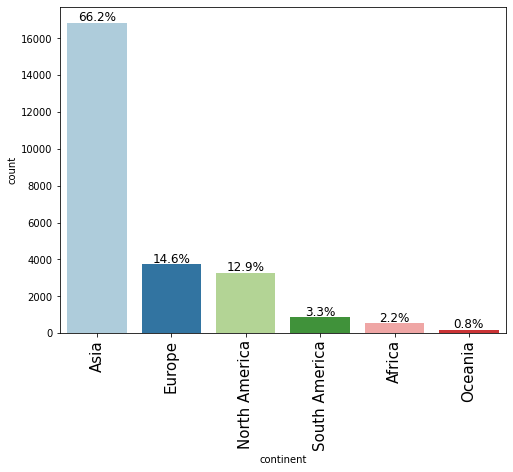

In [ ]:
labeled_barplot(data, 'continent', perc=True) 

Observations: We can see that a majority of applicants are from Asia, which is the most populated area in the world. I am interested in seeing the total percentage of certified applicants is negatively affect because of the high number of applicants from the same place, and whether being part of a smaller percentage helps because companies are looking for the diversity from all over.

### Exploring: education_of_employee 

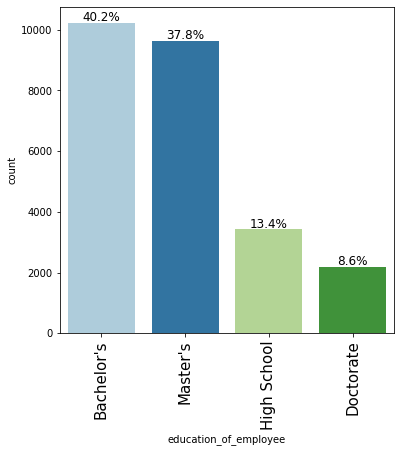

In [ ]:
labeled_barplot(data, 'education_of_employee', perc=True) 

Observations: It is interesting that the percentage of bachelors and masters are almost equal. I would of thought bachelors would be the large majority. I believe that this will play a big role in case_status since the most education you have normally means the more qualified you are.

### Exploring: has_job_experience

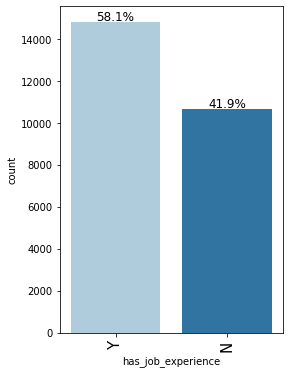

In [ ]:
labeled_barplot(data, 'has_job_experience', perc=True) 

Observations: A majority of applicants, 58.1%, have past job experience. In my opinion I think if you have job experience you are more likely to be certified because it will give you an edge over those who dont.

### Exploring: requires_job_training

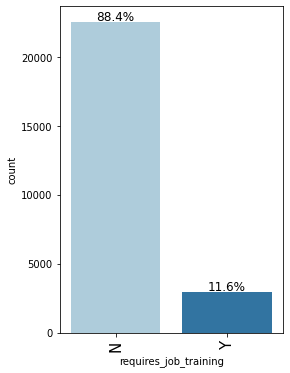

In [ ]:
labeled_barplot(data, 'requires_job_training', perc=True) 

Observations: Most of the employees do not require job training. It's not really what I expected but interested to see if this matters in the long run. I would predict that they would be less likely to certify a visa if the person required training and could fail the training; thus, not being able to perform the job, more liability.

### Exploring: no_of_employees

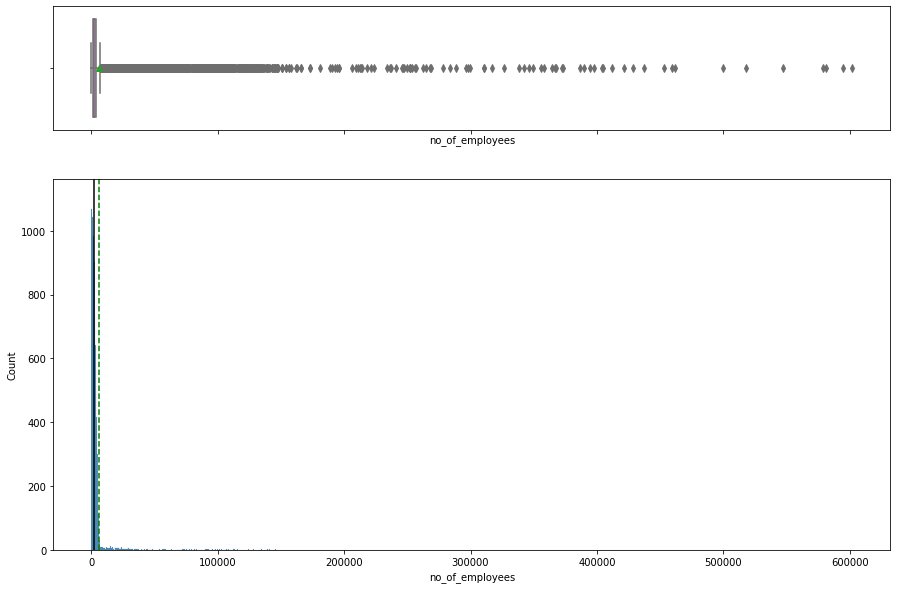

In [ ]:
histogram_boxplot(data, 'no_of_employees')

Observations: This graph doesnt really help us at all. You could remove outliers but I don't think any of them are mistakes. There are too many varying unique entries to provide any insight with the graph.

### Exploring: region_of_employment

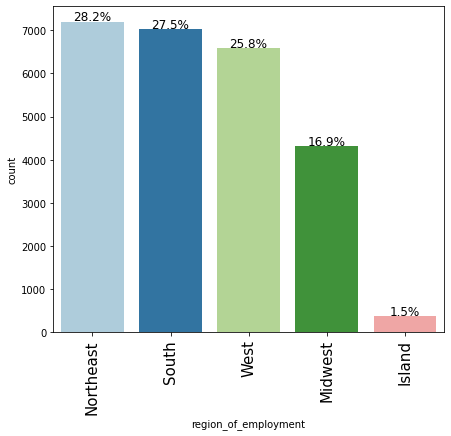

In [ ]:
labeled_barplot(data, 'region_of_employment', perc=True) 

Observations: We can see where the employees are going after the get their visa and it will be interesting to see if one region gets visas certified more over another. I predict that the northeast and west would have more visas aprroved because it is more populated which means more businesses that need employees.

### Exploring: unit_of_wage

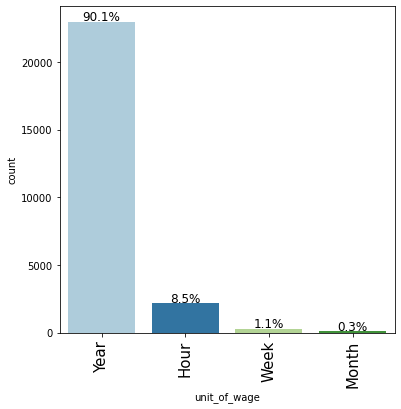

In [ ]:
labeled_barplot(data, 'unit_of_wage', perc=True) 

Observations: Year is the most popular option by employeers and I am not sure how this would affect the certified rate of visa considering year makes up a large portion of it.

### Exploring: full_time_position

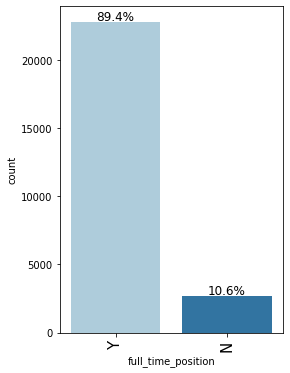

In [ ]:
labeled_barplot(data, 'full_time_position', perc=True) 

Observations: Most applicants are looking for a full time postition. 

### Exploring: case_status

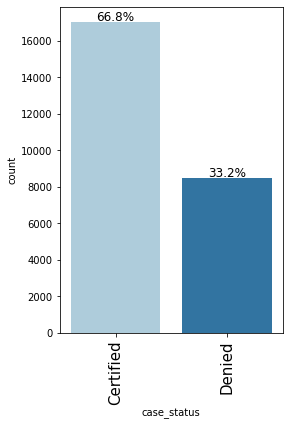

In [ ]:
labeled_barplot(data, 'case_status', perc=True) 

Obsercations: Just around two-thirds of applicants are certified for a visa, but when we dive further in we will be able to see which factors are the most important when deciding this.

## Bivariate Analysis:

### Exploring: Heatmap

<function matplotlib.pyplot.show>

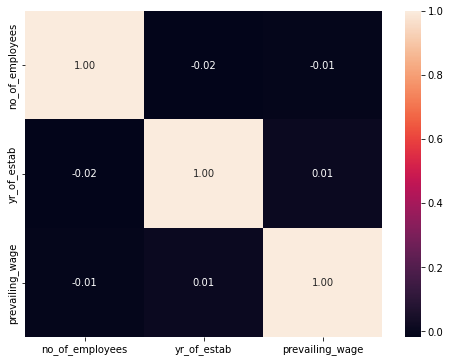

In [ ]:
# Lets start off bivariate analysis with a correlation heatmap of all of our columns.

# Start by creating a list of all column names
column_list = data.select_dtypes(include = np.number).columns.tolist()

# Then create a heatmap
plt.figure(figsize = (8,6))
sns.heatmap(data[column_list].corr(), annot = True, fmt = '.2f')
plt.show

Observations: The heat map does not provide us very much insight. The reason behind this is the heatmap compares numerical variables and since we only have three of them it leads to a small heatmap. Futhermore, there are no strong correlations between any of the variables listed above.

### Exploring: education_of_employee vs. case_status (Question 1)

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


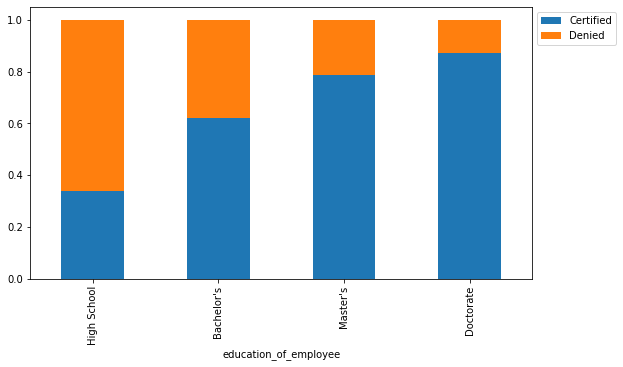

In [ ]:
stacked_barplot(data, 'education_of_employee', 'case_status')

Observations: My prediction of higher education means a higher certified rate was correct! The docorate degree has the highest rate of visa acceptance followed by masters, bachelors, and high school being the lowest acceptance. I think this will be an important feature later on.

### Exploring: continent vs. case_status (Question 2)

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


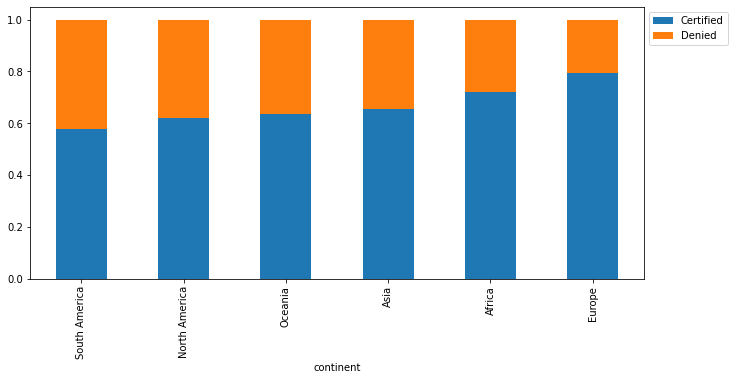

In [ ]:
stacked_barplot(data, 'continent', 'case_status')

Observations: A rate of certified visas are all pretty similar with Europe being the highest of all of them by a little bit. Not entirely sure why this might be the case my only guess would be that Europeans tend to have a better understanding of the English language so it makes them easier to communicate with employers.

### Exploring: has_job_experience vs. case_status (Question 3)

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


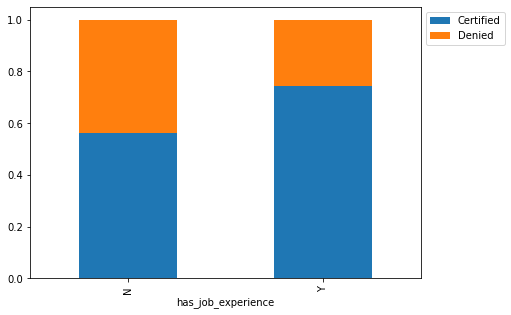

In [ ]:
stacked_barplot(data, 'has_job_experience', 'case_status')

Observations: Having previous job experience yeilds a greater chance at being approved for a visa. This makes a lot of sense having more experience makes your look better towards an employer. It isn't as great as a gap as I thought but still noticeable.

### Exploring: unit_of_wage vs. case_status (Question 4)

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


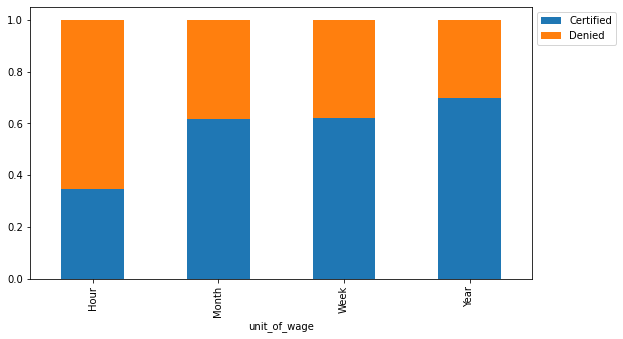

In [ ]:
stacked_barplot(data, 'unit_of_wage', 'case_status')

Observations: We can see that yearly wage is not only the most popular but also has the highest certied visa rate. Could this be the reason its so popular? Cant wait to see how impactful it is on the final model. Since hour unit of wage certified percentage is so much lower than the rest I think it could be an important branch in our decision tree.

### Exploring: prevailing_wage vs case_status (Question 5)

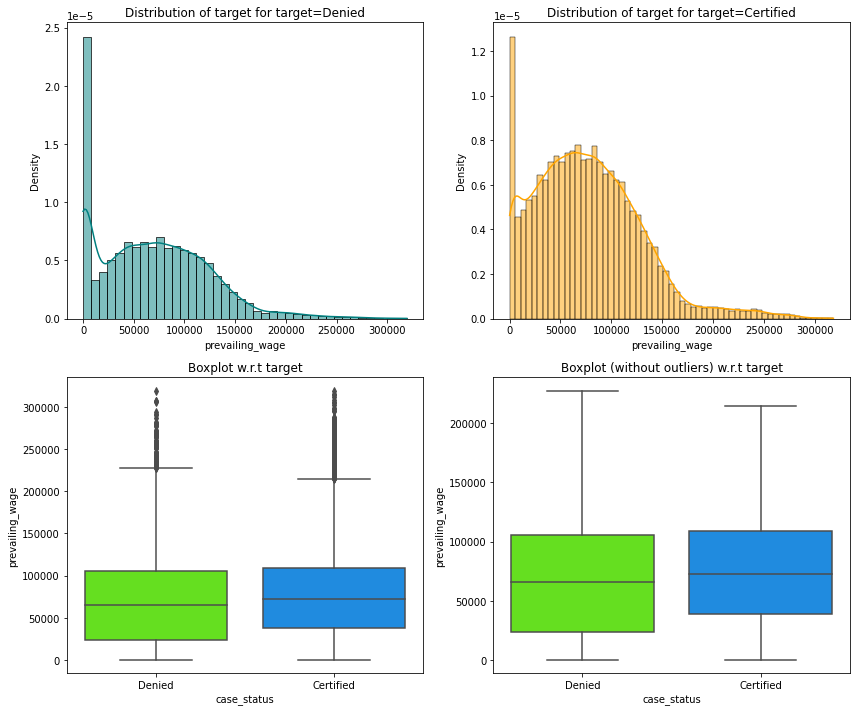

In [ ]:
distribution_plot_wrt_target(data,'prevailing_wage','case_status')

Observations: We can see that the mean of the prevailing wage of certified cases is higher not by too much but is noticeable. 

### Exploring: region_of_employment vs. prevailing_wage

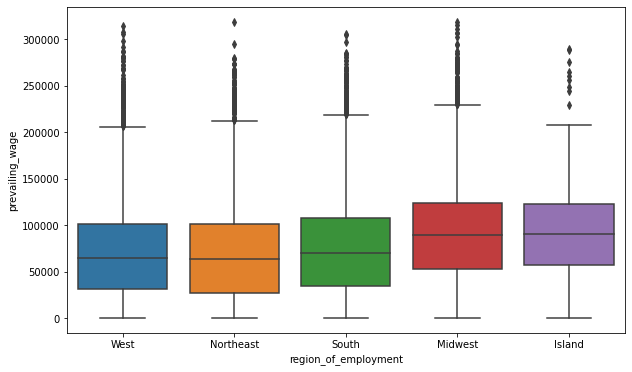

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = data, y = 'prevailing_wage', x = 'region_of_employment')

Observations: By comparing the prevailing wage to the region it is from we can see some interesting results. The highest mean wage is found in the Midwest and Islands while the lowest is the Northeast. There are plenty of reason why wage differs between places such as cost of living or the type of jobs.

### Exploring: continent vs. education_of_employee and region_of_employment vs. education_of_employee

education_of_employee  Bachelor's  Doctorate  High School  Master's    All
continent                                                                 
All                         10234       2192         3420      9634  25480
Asia                         7168        923         2290      6480  16861
Europe                       1299        846          490      1097   3732
North America                1225        258          401      1408   3292
South America                 333         89          137       293    852
Africa                        143         54           66       288    551
Oceania                        66         22           36        68    192
------------------------------------------------------------------------------------------------------------------------


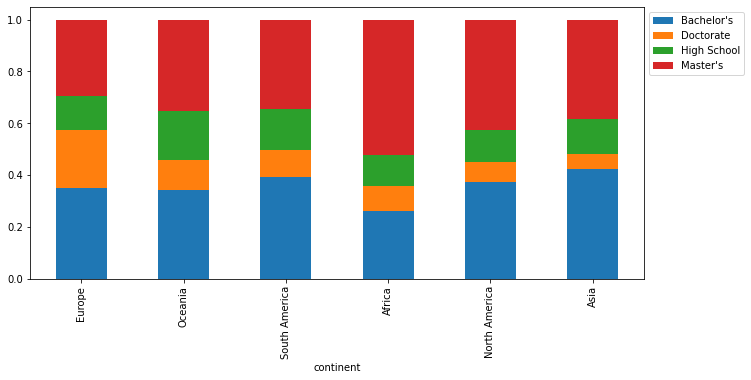

In [ ]:
stacked_barplot(data, 'continent', 'education_of_employee')

education_of_employee  Bachelor's  Doctorate  High School  Master's    All
region_of_employment                                                      
All                         10234       2192         3420      9634  25480
West                         2925        714          785      2162   6586
Northeast                    2874        656          905      2760   7195
South                        2991        541          934      2551   7017
Midwest                      1315        256          736      2000   4307
Island                        129         25           60       161    375
------------------------------------------------------------------------------------------------------------------------


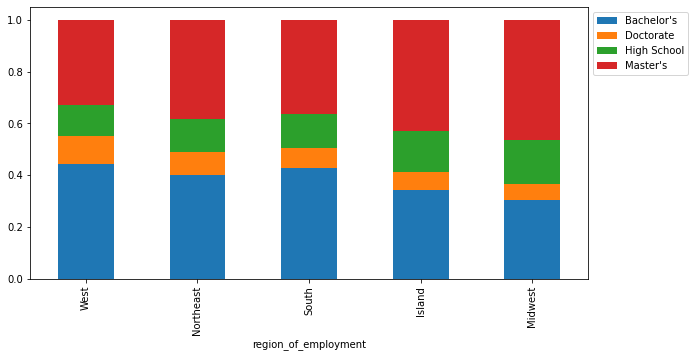

In [ ]:
stacked_barplot(data, 'region_of_employment', 'education_of_employee')

Observations: I was really just curious about the education spread between the different continents and regions. Very interesting to me and is not a direct correlation to how well the continents total education population.Most regions certify around the same amount of high school educated employees and its interesting that the Midwest has the most number of Master's educated employees. I wonder what jobs are availible in the Midwest.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [ ]:
# Use this to find missing values in each column
data.isnull().sum()
# We have no missing values so no further action needed

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

### Outlier Detection

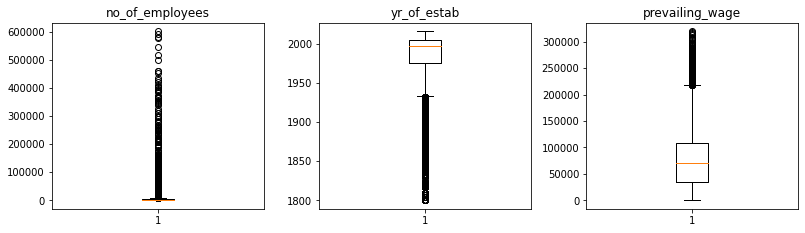

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations: There is no actions needed to fix any outliers. We have numerous amounts of outliers; however, they are all in groups and no extreme single outliers. Futhermore, to reiterate there is no missing data.

### Data Preparation

In [ ]:
# We need to make case_status into a numerical variabel, so we are going to change it so 1 is Certified and 0 is Denied
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

# specifying the independent and dependent variables
X = data.drop(['case_status'], axis=1)
Y = data['case_status']

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting data in train and test sets into a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
# Print it out and make sure everything looks right
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))
# We can see that the data was split. It is not a perfect 70:30 but will still do.

Number of rows in train data = 17836
Number of rows in test data = 7644
Percentage of classes in training set:
1    0.663602
0    0.336398
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.677917
0    0.322083
Name: case_status, dtype: float64


## Useful functions for model testing

In [ ]:
# We will need this function for checking the training preformance
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model

def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
# There are a couple of functions that we will need in order to help up with the decision tree process
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# And we also need the confusion matrix function for sklearn
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Building a Decision Tree

In [ ]:
# Lets start with the decision tree classifier model
model = DecisionTreeClassifier(random_state = 1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

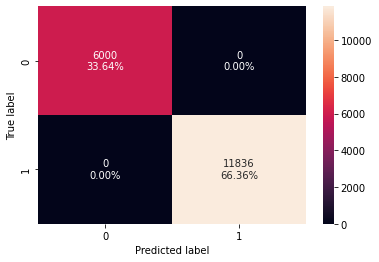

In [ ]:
# We shall analysis the model with a confusion matrix and a proformance check for both the train and test data.
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_model_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_model_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


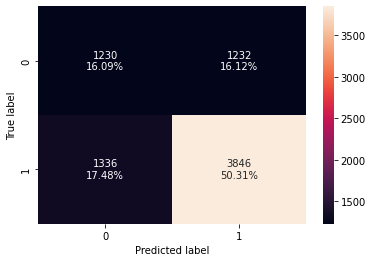

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
decision_tree_model_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_model_test

,Accuracy,Recall,Precision,F1
0,0.66405,0.742184,0.757385,0.749708


Obervations: The Data runs really well on the training data, but much worse on the test data. Since the problem we are dealing with is a national, economic one, we want to reduce the number of false negatives and false positives since they will be costly. In order to do this lets focus on getting a higher f1 score for the rest of our models.

### Pruning

In [ ]:
# Lets prune our decision tree
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "max_leaf_nodes": [3, 5, 7],
    "min_samples_split": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=7,
                       min_impurity_decrease=0.0001, random_state=1)

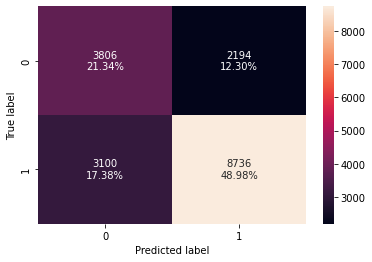

In [ ]:
# Lets check the proformance of the tuned model
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tuned_model_train = model_performance_classification_sklearn(estimator, X_train, y_train)
decision_tree_tuned_model_train

,Accuracy,Recall,Precision,F1
0,0.703185,0.738087,0.799268,0.76746


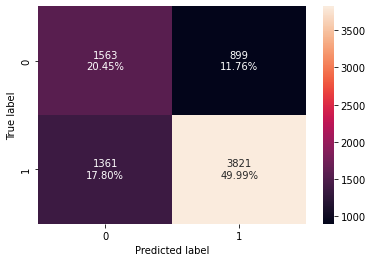

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tuned_model_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_tuned_model_test

,Accuracy,Recall,Precision,F1
0,0.704343,0.73736,0.809534,0.771763


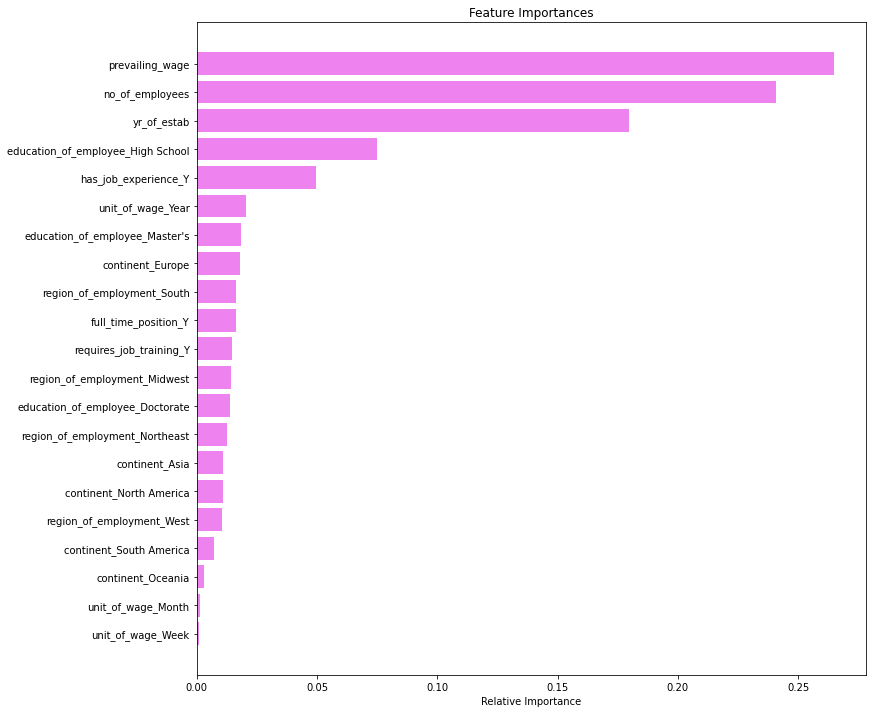

In [ ]:
feature_names = X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observations: By looking at the prerformances of testing data before and after turning, we can see that everything except recall increase approximately 4 percent. With an f1 score around 0.7718 is pretty good, but I think we can do better with another model. We can also see, by looking at the important features, that for the decision tree prevailing wage, no_of_employees, and yr_of_estab are the the tree most important. Very strange to see yr_of_estab up there and did not think it would be so infuenctial.

## Creating bagging model

Bagging is the ensemble method that using a combination of independent random sample predictions. Each point has an equal probablity of being selected and since I am using classification the final prediction is the mode of prediction of base estimators.

In [ ]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

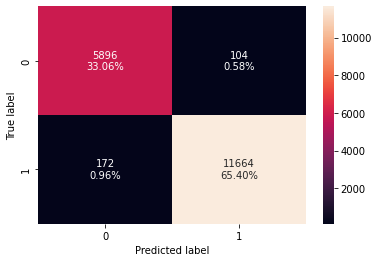

In [ ]:
# We shall analysis the model with a confusion matrix and a proformance check for both the train and test data.
confusion_matrix_sklearn(bagging, X_train, y_train)

In [ ]:
bagging_model_train = model_performance_classification_sklearn(bagging, X_train, y_train)
bagging_model_train

,Accuracy,Recall,Precision,F1
0,0.984526,0.985468,0.991162,0.988307


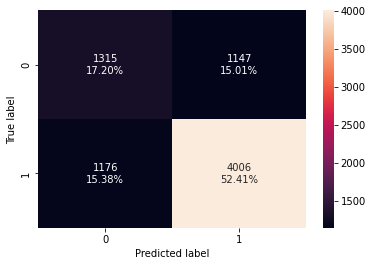

In [ ]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [ ]:
bagging_model_test = model_performance_classification_sklearn(bagging, X_test, y_test)
bagging_model_test

,Accuracy,Recall,Precision,F1
0,0.696102,0.773061,0.777411,0.77523


### Bagging Classifier Tuning

In [ ]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=110,
                  random_state=1)

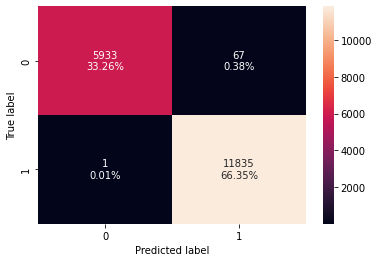

In [ ]:
# Lets check the tuned model
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)

In [ ]:
bagging_tuned_model_train = model_performance_classification_sklearn(bagging_estimator_tuned, X_train, y_train)
bagging_tuned_model_train

,Accuracy,Recall,Precision,F1
0,0.996187,0.999916,0.994371,0.997135


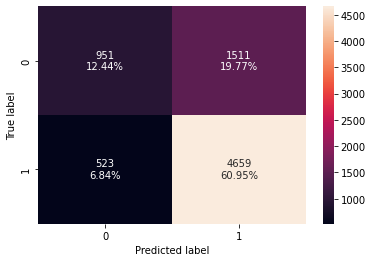

In [ ]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

In [ ]:
bagging_tuned_model_test = model_performance_classification_sklearn(bagging_estimator_tuned, X_test, y_test)
bagging_tuned_model_test

,Accuracy,Recall,Precision,F1
0,0.733909,0.899074,0.755105,0.820825


Observations: After evaluating the bagging model before and after tuning, we can see that after tuning the recall score is much higher with a 12 percent increase. Furthermore, the f1 score is higher than the previous decision tree model with a slight precision drop.


## Random Forest

A random forest uses bagging to randomly sample for multiple decision trees and then combines the predictions to create a more accurate result than a single tree.

In [ ]:
# Lets create a random forest classifier.
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

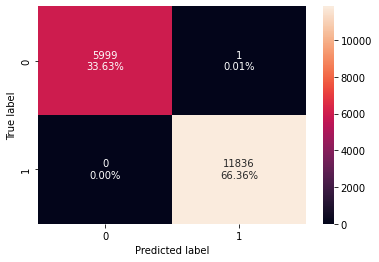

In [ ]:
# We shall analysis the model with a confusion matrix and a proformance check for both the train and test data.
confusion_matrix_sklearn(rf, X_train, y_train)

In [ ]:
rf_model_train = model_performance_classification_sklearn(rf, X_train, y_train)
rf_model_train

,Accuracy,Recall,Precision,F1
0,0.999944,1.0,0.999916,0.999958


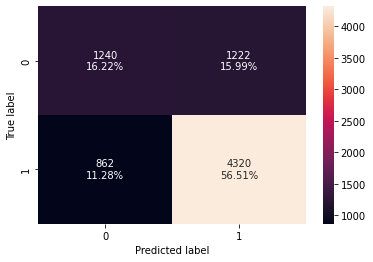

In [ ]:
confusion_matrix_sklearn(rf, X_test, y_test)

In [ ]:
rf_model_test = model_performance_classification_sklearn(rf, X_test, y_test)
rf_model_test

,Accuracy,Recall,Precision,F1
0,0.727368,0.833655,0.779502,0.80567


### Random Forest Tuning

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs = -1)
grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=7,
                       n_estimators=20, oob_score=True, random_state=1)

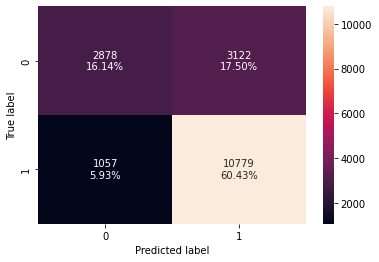

In [ ]:
# Lets check out the tuned model
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

In [ ]:
rf_tuned_model_train = model_performance_classification_sklearn(rf_tuned, X_train, y_train)
rf_tuned_model_train

,Accuracy,Recall,Precision,F1
0,0.765699,0.910696,0.775412,0.837627


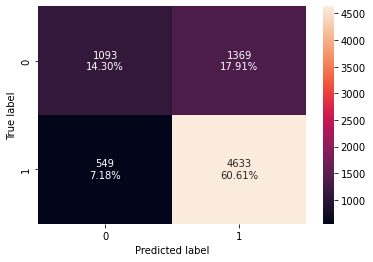

In [ ]:
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

In [ ]:
rf_tuned_model_test = model_performance_classification_sklearn(rf_tuned, X_test, y_test)
rf_tuned_model_test

,Accuracy,Recall,Precision,F1
0,0.749084,0.894056,0.771909,0.828505


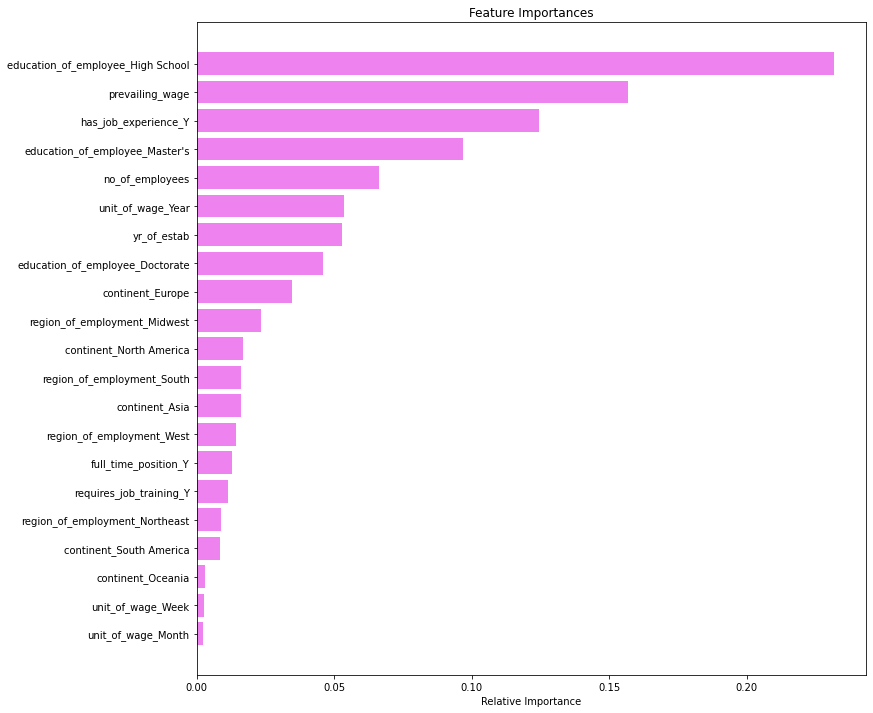

In [ ]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observations: After looking at the random forest before and after tuning, we can see that there was a slight increasse in everything except precision. Once again, we have reached a new high for f1 score. Unlike the decision tree, the most important feature of the random forest is education_of_employee_High_School, prevailing_wage, and has_job_experience_Y. It will be interesting to see how the important features change depending on the different processes of building a model.

## Creating a Boosting Model

Boosting is a method of sequential training which involves many weighted weak learners one after another to improve the accuracy of dependent samples

### AdaBoost

AdaBoost is a boosting algorithm that assigns equal weight to every sample, but as weak learners are built they change the weight of each sample accordingly until the final prediction is built as a weighted majority average of all the weak learners.

In [ ]:
abc=AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

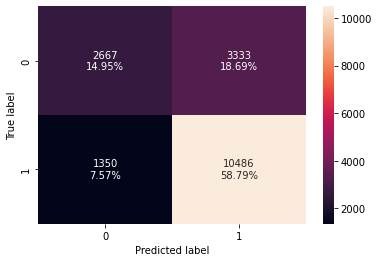

In [ ]:
# We shall analysis the model with a confusion matrix and a proformance check for both the train and test data.
confusion_matrix_sklearn(abc, X_train, y_train)

In [ ]:
abc_model_train = model_performance_classification_sklearn(abc, X_train, y_train)
abc_model_train

,Accuracy,Recall,Precision,F1
0,0.737441,0.885941,0.75881,0.817462


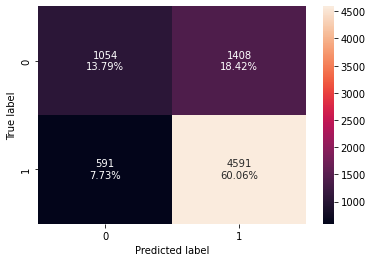

In [ ]:
confusion_matrix_sklearn(abc, X_test, y_test)

In [ ]:
abc_model_test = model_performance_classification_sklearn(abc, X_test, y_test)
abc_model_test

,Accuracy,Recall,Precision,F1
0,0.738488,0.885951,0.765294,0.821215


#### AdaBoost Tuning

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train) 

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=90, random_state=1)

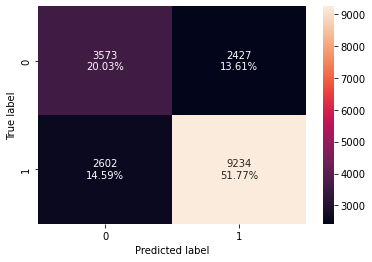

In [ ]:
# Lets check out the tuned model
confusion_matrix_sklearn(abc_tuned, X_train, y_train)

In [ ]:
abc_tuned_model_train = model_performance_classification_sklearn(abc_tuned, X_train, y_train)
abc_tuned_model_train

,Accuracy,Recall,Precision,F1
0,0.718042,0.780162,0.79187,0.785973


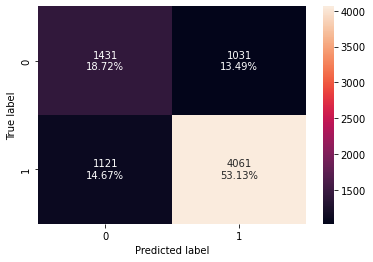

In [ ]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

In [ ]:
abc_tuned_model_test = model_performance_classification_sklearn(abc_tuned, X_test, y_test)
abc_tuned_model_test

,Accuracy,Recall,Precision,F1
0,0.718472,0.783674,0.797526,0.790539


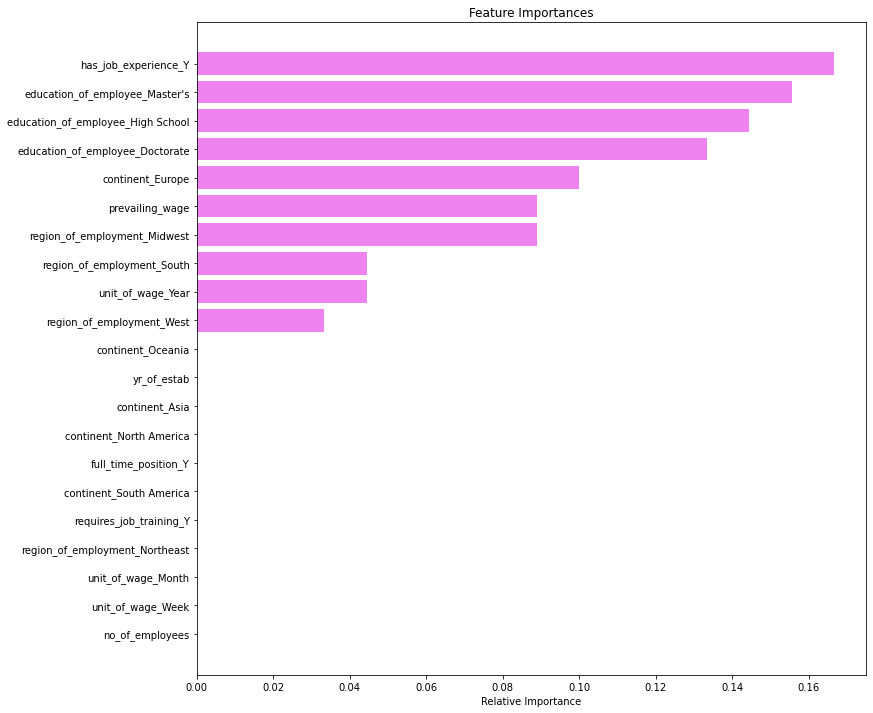

In [ ]:
feature_names = X_train.columns
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observations: After looking at the AdaBoost model before and after tuning, we can see that the tuned version is a little worse in terms of everything except for precision. Just by comparing the last few models to this one, this one might not be the best model. Could the decrease in proformance be due to this models important features? Contrary to the other models, all of the type of education is very influential while just one is influential of the others.

### Gradient Boosting

The goal of Gradient Boosting is to minimize the residuals, or errors made by the rpevious weak learner, in order to provide a more accurate prediction

In [ ]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

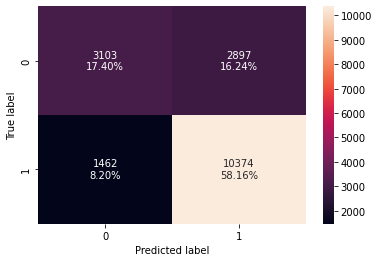

In [ ]:
# We shall analysis the model with a confusion matrix and a proformance check for both the train and test data.
confusion_matrix_sklearn(gbc, X_train, y_train)

In [ ]:
gbc_model_train = model_performance_classification_sklearn(gbc, X_train, y_train)
gbc_model_train

,Accuracy,Recall,Precision,F1
0,0.755607,0.876479,0.781704,0.826383


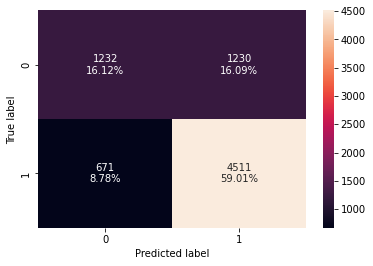

In [ ]:
confusion_matrix_sklearn(gbc, X_test, y_test)

In [ ]:
gbc_model_test = model_performance_classification_sklearn(gbc, X_test, y_test)
gbc_model_test

,Accuracy,Recall,Precision,F1
0,0.751308,0.870513,0.785752,0.825964


#### Gradient Boosting Tuning

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train) 

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=200, random_state=1,
                           subsample=0.9)

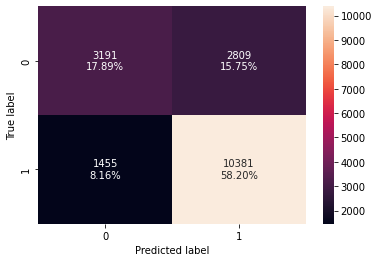

In [ ]:
# Lets look at the tuned model
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

In [ ]:
gbc_tuned_model_train = model_performance_classification_sklearn(gbc_tuned, X_train, y_train)
gbc_tuned_model_train

,Accuracy,Recall,Precision,F1
0,0.760933,0.87707,0.787036,0.829617


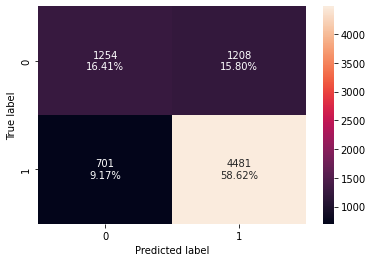

In [ ]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [ ]:
gbc_tuned_model_test = model_performance_classification_sklearn(gbc_tuned, X_test, y_test)
gbc_tuned_model_test

,Accuracy,Recall,Precision,F1
0,0.750262,0.864724,0.78766,0.824395


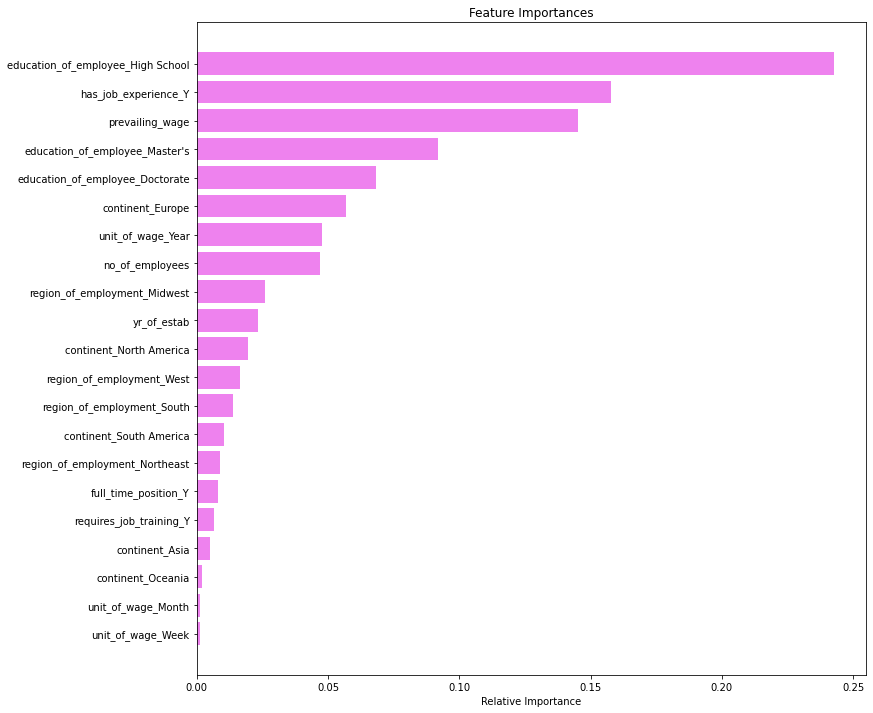

In [ ]:
feature_names = X_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observations: After looking at the gradient boosting model before and after tuning, we can that the training and test data are pretty consistent and high in values, which is a good thing. After review a few models and there feature importance graph, we can see a trend forming. education_of_employee_High_School, has_job_experiene_Y, and prevailing_wage are very important to all models.

### XGBoost 

In [ ]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

XGBClassifier(random_state=1)

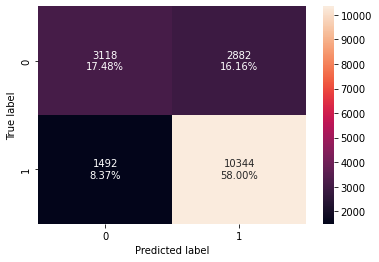

In [ ]:
# We shall analysis the model with a confusion matrix and a proformance check for both the train and test data.
confusion_matrix_sklearn(xgb, X_train, y_train)

In [ ]:
xgb_model_train = model_performance_classification_sklearn(xgb, X_train, y_train)
xgb_model_train

,Accuracy,Recall,Precision,F1
0,0.754766,0.873944,0.782096,0.825473


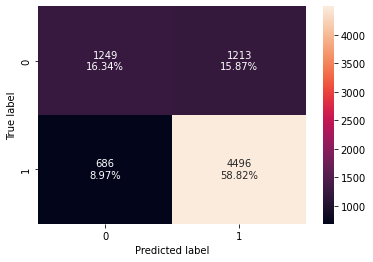

In [ ]:
confusion_matrix_sklearn(xgb, X_test, y_test)

In [ ]:
xgb_model_test = model_performance_classification_sklearn(xgb, X_test, y_test)
xgb_model_test

,Accuracy,Recall,Precision,F1
0,0.75157,0.867619,0.787528,0.825636


#### XGBoost Tuning

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train) 

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(colsample_bylevel=0.9, colsample_bytree=0.9,
              eval_metric='logloss', gamma=5, n_estimators=200, random_state=1)

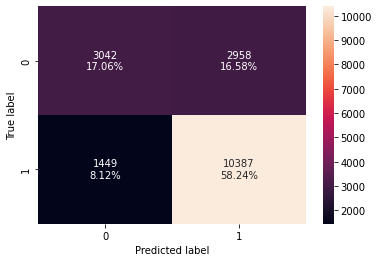

In [ ]:
# Lets look at the tuned model
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

In [ ]:
xgb_tuned_model_train = model_performance_classification_sklearn(xgb_tuned, X_train, y_train)
xgb_tuned_model_train

,Accuracy,Recall,Precision,F1
0,0.752915,0.877577,0.778344,0.824987


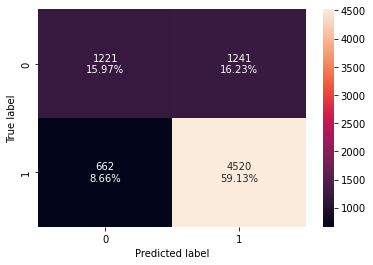

In [ ]:
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

In [ ]:
xgb_tuned_model_test = model_performance_classification_sklearn(xgb_tuned, X_test, y_test)
xgb_tuned_model_test

,Accuracy,Recall,Precision,F1
0,0.751047,0.87225,0.784586,0.826099


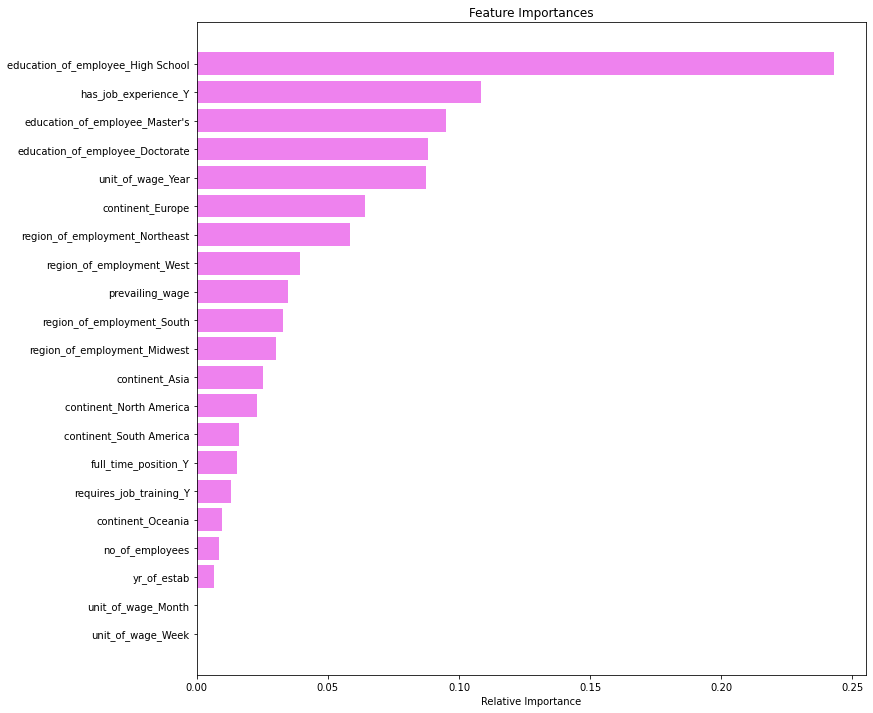

In [ ]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observations: After looking at the XGBoost model before and after tuning, we can see that we have some of the highest scores, but are not that consistent between the training and test. Interesting, it has pravailing_wage as a not so important feature when every other model put it very high.

### Stacking

Stacking combines all of t predictions from the other models we have created in order to build a new model.

In [ ]:
estimators = [("AdaBoost", abc),("Gradient Boosting", gbc_tuned),("Random Forest", rf_tuned),]

final_estimator = xgb_tuned

In [ ]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='sqrt',
                                                       min_samples_split=7,
                                                       n_estimators=20,
                                                       oob_score=True,
                       

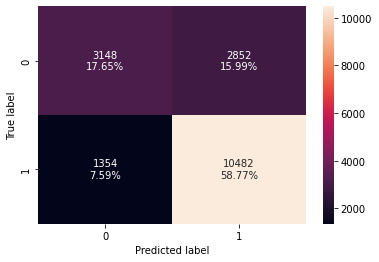

In [ ]:
confusion_matrix_sklearn(stacking_estimator, X_train, y_train)

In [ ]:
stacking_model_train = model_performance_classification_sklearn(stacking_estimator, X_train, y_train)
stacking_model_train

,Accuracy,Recall,Precision,F1
0,0.764185,0.885603,0.786111,0.832896


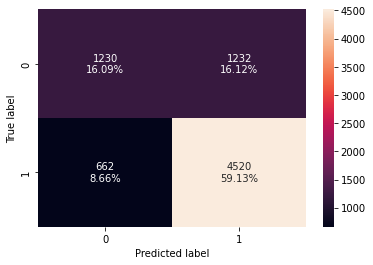

In [ ]:
confusion_matrix_sklearn(stacking_estimator, X_test, y_test)

In [ ]:
stacking_model_test = model_performance_classification_sklearn(stacking_estimator, X_test, y_test)
stacking_model_test

,Accuracy,Recall,Precision,F1
0,0.752224,0.87225,0.785814,0.826779


Observations: After looking

## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_model_train.T,
        decision_tree_tuned_model_train.T,
        bagging_model_train.T,
        bagging_tuned_model_train.T,
        rf_model_train.T,
        rf_tuned_model_train.T,
        abc_model_train.T,
        abc_tuned_model_train.T,
        gbc_model_train.T,
        gbc_tuned_model_train.T,
        xgb_model_train.T,
        xgb_tuned_model_train.T,
        stacking_model_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]

In [ ]:
# training performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_model_test.T,
        decision_tree_tuned_model_test.T,
        bagging_model_test.T,
        bagging_tuned_model_test.T,
        rf_model_test.T,
        rf_tuned_model_test.T,
        abc_model_test.T,
        abc_tuned_model_test.T,
        gbc_model_test.T,
        gbc_tuned_model_test.T,
        xgb_model_test.T,
        xgb_tuned_model_test.T,
        stacking_model_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]

In [ ]:
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.703185,0.984526,0.996187,0.999944,0.765699,0.737441,0.718042,0.755607,0.760933,0.754766,0.752915,0.764185
Recall,1.0,0.738087,0.985468,0.999916,1.000000,0.910696,0.885941,0.780162,0.876479,0.877070,0.873944,0.877577,0.885603
Precision,1.0,0.799268,0.991162,0.994371,0.999916,0.775412,0.758810,0.791870,0.781704,0.787036,0.782096,0.778344,0.786111
F1,1.0,0.767460,0.988307,0.997135,0.999958,0.837627,0.817462,0.785973,0.826383,0.829617,0.825473,0.824987,0.832896


In [ ]:
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.664050,0.704343,0.696102,0.733909,0.727368,0.749084,0.738488,0.718472,0.751308,0.750262,0.751570,0.751047,0.752224
Recall,0.742184,0.737360,0.773061,0.899074,0.833655,0.894056,0.885951,0.783674,0.870513,0.864724,0.867619,0.872250,0.872250
Precision,0.757385,0.809534,0.777411,0.755105,0.779502,0.771909,0.765294,0.797526,0.785752,0.787660,0.787528,0.784586,0.785814
F1,0.749708,0.771763,0.775230,0.820825,0.805670,0.828505,0.821215,0.790539,0.825964,0.824395,0.825636,0.826099,0.826779


### Final Feature Importance

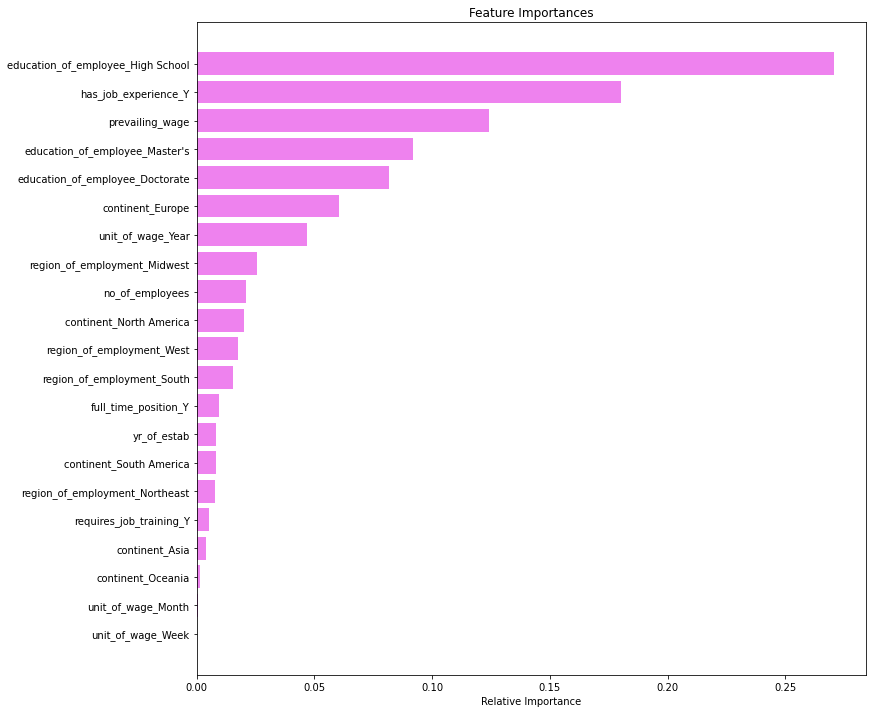

In [ ]:
feature_names = X_train.columns
importances = gbc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Actionable Insights and Recommendations

After comparing the training and testing data of all of our tuned and untuned model, I have these insights:
1. Our original goal was to increase the f1-score as much as possible in order to avoid false positives and false negatives, so the model with the highest f1-score is the Stacking model with 0.826779. However, most of the f1-scores along the board were very good and hovered around approximately 0.82
1. That being said, I think the untuned gradient boost model is good because it is very consistent between its training and test data, which is a nice thing to have.
1. I think its very important to understand that there will never be a 100 percent accurate model and it's amazing to test each model and see the slight differences that pop up when working with the same data but different models. Such as the feature importance graph. I though the important variables would always be the same no matter what.

By looking at the Feature Importanct graph, I can provide some recommendations to future visa applicants to insure success:
1. The most influential variable to having your visa certified is education_of_employee_High_School. This actually means if you have a high school education you are less liekly to be certified and having higher education increases you chance of certification.
1. Secondly, your chances greatly increase if you have previous job experience. I predicted this would be the case and makes a lot of sense because having job experience is a good way of showing your employeer you are capable and could also include some references that would help you get approved.
1. The mean of the prevailing wage of the ceritified visas is lower than those visa who are declined. So applying for a lower paying job has a greater chance of getting ceritifed. However, do not sell your own personal abilities short and know your wealth.
1. Europe has the greatest certification percentage and is shown in the feature importance, so maybe they are more lenient and generous about giving visas. Think about where you might want to apply for location is important. 